In [3]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [6]:
churn_df = pd.read_csv("Churn.csv")

In [7]:
print(churn_df.head)

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [20]:
churn_df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
churn_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


(7043,) (7043,)


In [34]:
features = [
    "MonthlyCharges",
    "TotalCharges",
    "Contract",
    "InternetService",
    "PaymentMethod",
    "PaperlessBilling",
    "StreamingMovies"
]
target = [ "Churn"]

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# --- Example preprocessing ---
# Clean the TotalCharges column (convert to numeric)
churn_df["TotalCharges"] = pd.to_numeric(churn_df["TotalCharges"], errors="coerce")
churn_df = churn_df.dropna(subset=["TotalCharges"])

# Choose features for X (include both numeric and categorical)
features = [
    "MonthlyCharges",
    "TotalCharges",
    "Contract",
    "InternetService",
    "PaymentMethod",
    "PaperlessBilling"
]

# Target column
target = "Churn"

# --- Encoding categorical columns ---
# One-hot encode categorical variables (creates numeric columns)
X = pd.get_dummies(churn_df[features], drop_first=True)
y = churn_df[target].apply(lambda x: 1 if x == "Yes" else 0)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# --- Split into train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Feature scaling (important for KNN) ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Train KNN ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# --- Evaluate model ---
print("KNN Accuracy:", knn.score(X_test, y_test))


Shape of X: (7032, 10)
Shape of y: (7032,)
KNN Accuracy: 0.7647476901208244


In [57]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 10)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

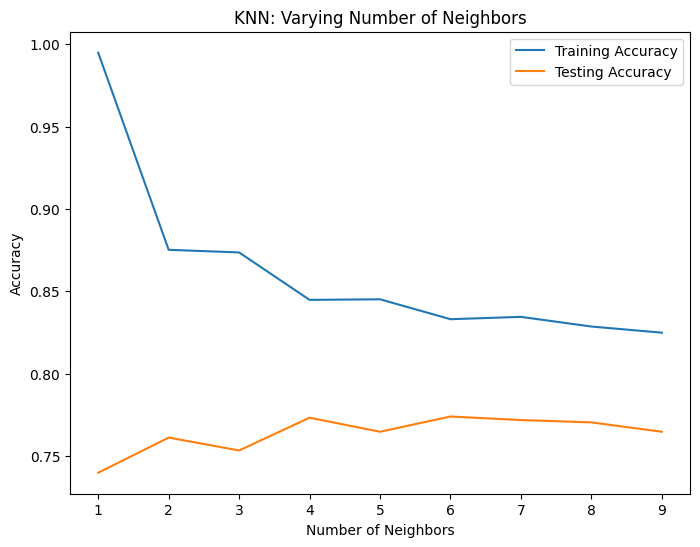

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

X = pd.get_dummies(churn_df[features], drop_first=True)
y = churn_df["MonthlyCharges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluate
y_pred = lin_reg.predict(X_test)
print("Linear Regression R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Linear Regression R² Score: 1.0
Mean Squared Error: 3.8999399307188986e-27


In [65]:
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)

  # Fit the data
  ridge.fit(X_train, y_train)

  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.2508243350016469, 0.2508271388295912, 0.2508536242700645, 0.25099891160647314, 0.2483657365436751, 0.1848821149994977]


[ 0.00764511 -0.00010488 -0.         -0.          0.         -0.
 -0.          0.         -0.          0.        ]


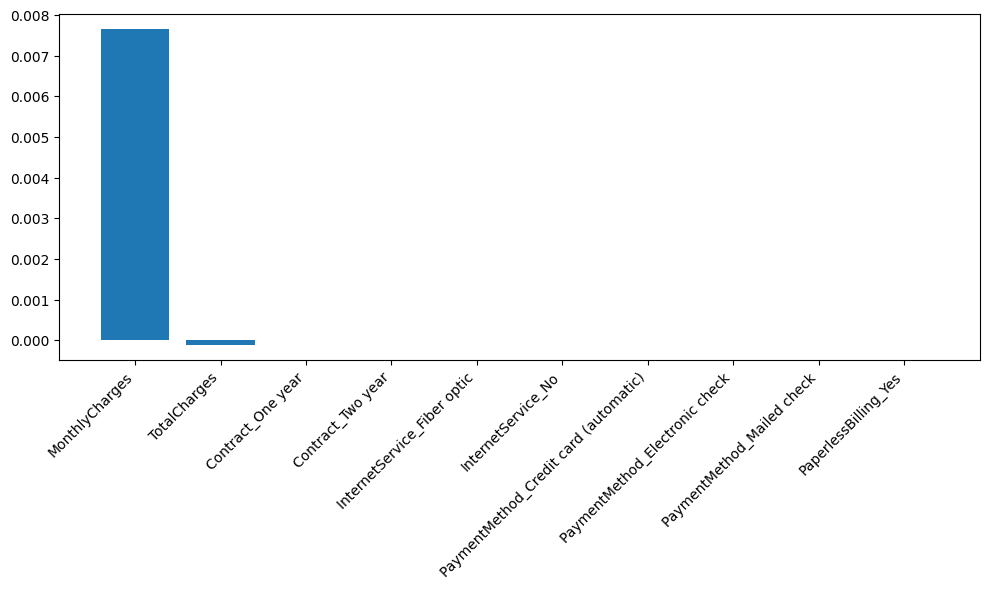

In [71]:
# Import Lasso
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = X.columns

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, lasso_coef)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping

In [72]:
# --- Logistic Regression (predict Churn) ---
X = pd.get_dummies(churn_df[features], drop_first=True)
y = churn_df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.7818052594171997
